### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# pd.set_option("display.max_columns", None)

### Load data into the variable customer_df and look at main features (head, shape, info)

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [3]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Rename the columns so they follow the PE8 (snake case)
### Change effective to date column to datetime format

In [4]:
customer_df.columns = [col.lower().replace(' ', '_') for col in customer_df.columns]

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Create a new dataframe using only the numerical data called numerical_df

In [5]:
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Define a function that differentiates between continuous and discrete variables

In [6]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [7]:
#count unique values 

for col in numerical_df:
    print(col, numerical_df[col].nunique())

customer_lifetime_value 8041
income 5694
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
total_claim_amount 5106


In [8]:
# Store continuous data into a continuous_df variable and do the same for discrete_df

continuous_df = []
discrete_df = []

def sorting(df):
    for col in df.columns:
        if df[col].nunique() > 100:
            continuous_df.append(col)
        else:
            discrete_df.append(col)

In [9]:
# call function

sorting(numerical_df)

In [10]:
continuous_df

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

In [11]:
discrete_df

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

### Plot a correlation matrix, comment what you see

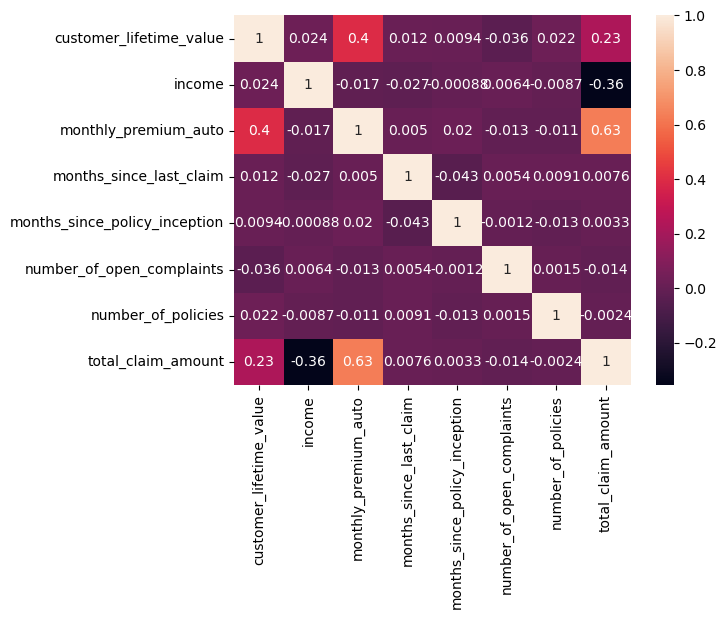

In [12]:
corr_matrix=numerical_df.corr(method='pearson') 
sns.heatmap(corr_matrix, annot=True)
plt.show()

Here I see that total claim amount and monthly premium auto have a higher correlation than the others. Also I noticed that areas where we see a slightly higher correlation are amongst continous data as opposed to discrete data. Just an observation.

### Create a function to plot every discrete variable

In [13]:
discretedata = customer_df[discrete_df]
print(discretedata.shape)
discretedata.head()

(9134, 4)


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [14]:
def plotdis(df):
    for col in df.columns:
        if df[col].nunique() < 10:
            sns.countplot(x=col,data=df)
            plt.show()
        else:
            sns.histplot(x=col,data=df)
            plt.show()

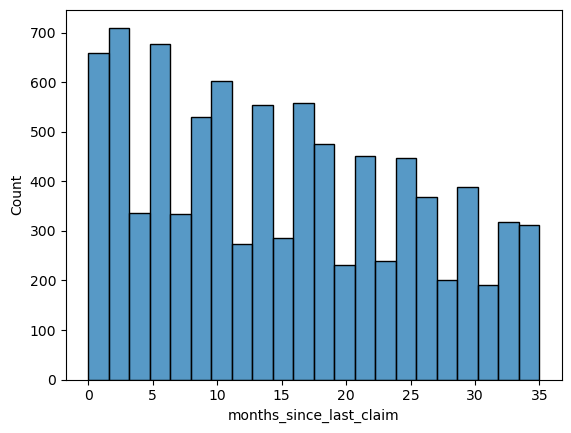

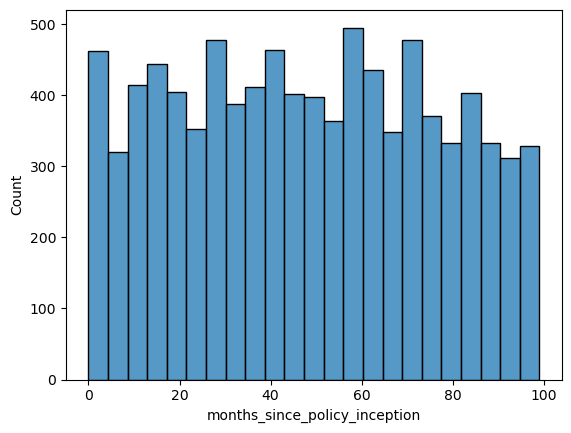

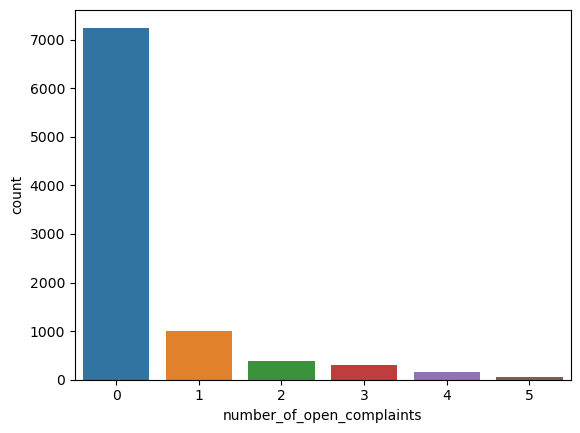

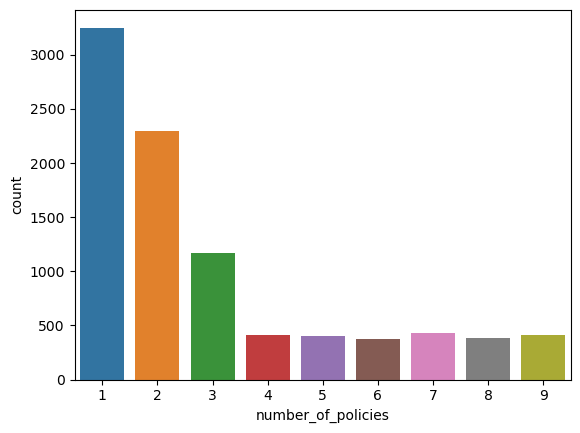

In [15]:
plotdis(discretedata)

Here, I see that number of open complaints has an abundance of 0 values. Number of policies goes from high to low as the value increases. Months since policy inception doesn't really have any pattern.

### Do the same with the continuous variables 

In [16]:
contdata = customer_df[continuous_df]
print(contdata.shape)
contdata.head()

(9134, 4)


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


In [17]:
def plotcont(df):
    for col in df.columns:
        sns.histplot(x=col,data=df)
        plt.show()

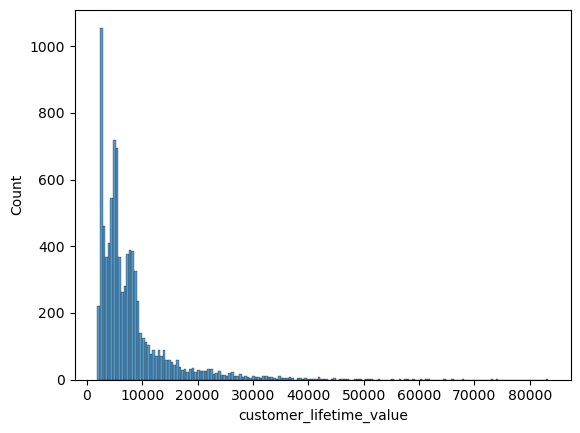

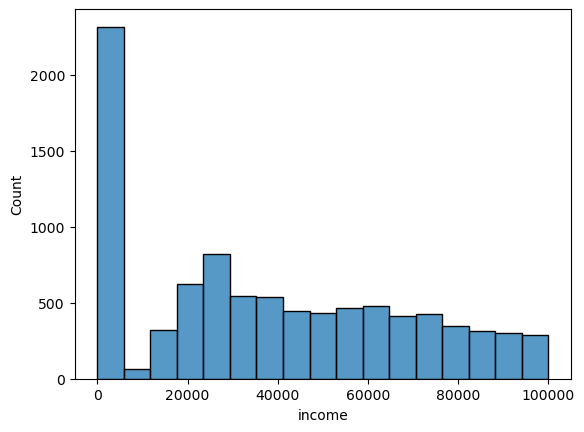

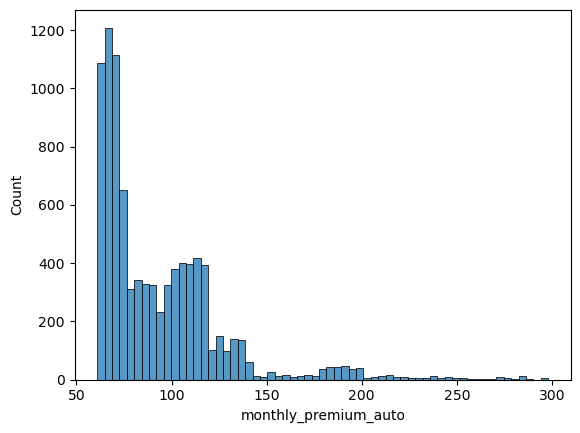

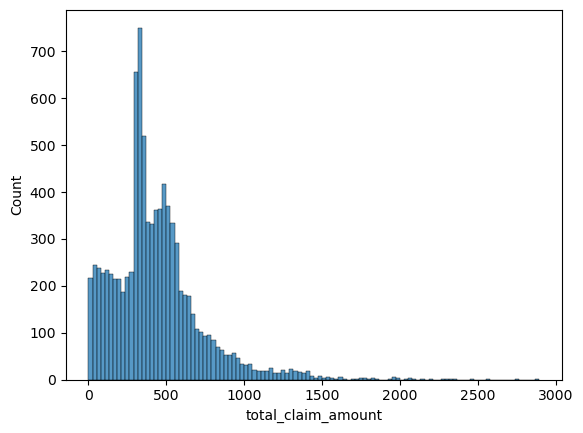

In [18]:
plotcont(contdata)

Here, I don't see a normal distribution, I see that the distributions in the different plots are mostly skewed right. The income column also has a high concentration of 0 to low values.

### Look for outliers in the continuous variables

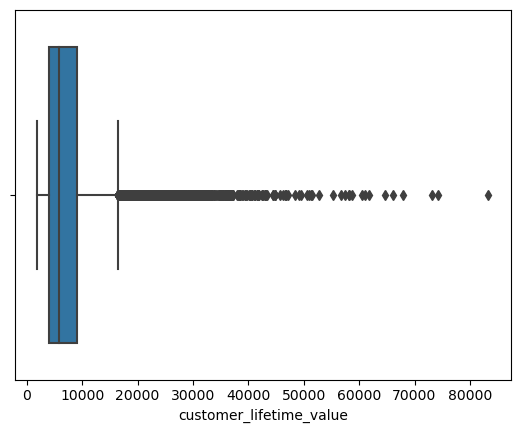

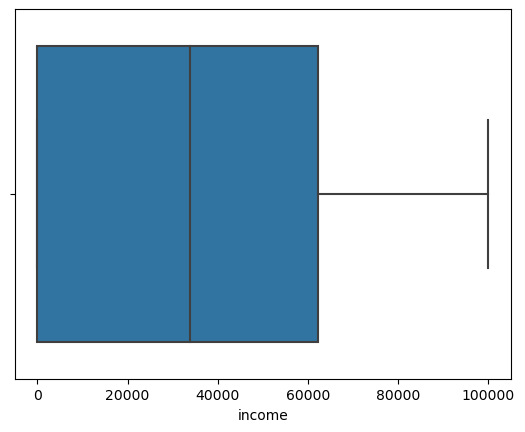

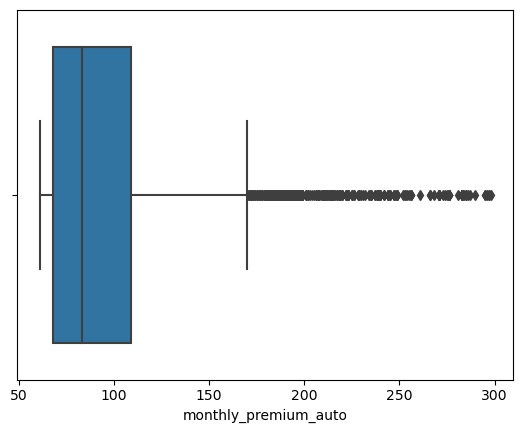

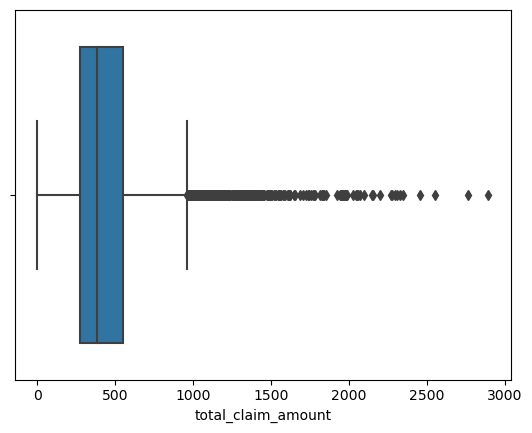

In [19]:
for col in contdata.columns:
    sns.boxplot(x=col,data=contdata)
    plt.show()

### Did you find outliers? Comment what you will do with them

In [20]:
numerical_df[numerical_df['customer_lifetime_value'] > 70000]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1974,74228.51604,0,242,1,34,0,2,1742.4
5716,83325.38119,58958,231,31,74,0,2,1108.8
6252,73225.95652,39547,202,11,21,0,2,969.6


There are just 3 outliers in customer_lifetime_value that are very different from the rest, so we can remove them. In income the 0's are for unemployed customers so we will keep them. We would also leave total claim amount, since its the target variable.

In [21]:
# drop rows from numerical
numerical_df = numerical_df[numerical_df['customer_lifetime_value'] < 70000]
numerical_df.shape

(9131, 8)

In [22]:
# drop rows from dataframe
customer_df = customer_df[customer_df['customer_lifetime_value'] < 70000]
customer_df.shape

(9131, 24)

### Check all columns for NaN values

In [23]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Lab | Cleaning categorical data.

### Find all of the categorical data. Save it in a categorical_df variable

In [24]:
categorical_df = customer_df.select_dtypes(include = object)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Check for NaN values and decide what to do with them

In [25]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### Check all unique values of columns

In [26]:
categorical_df.nunique()

customer            9131
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

### Check dtypes. Do they all make sense as categorical data?

In [27]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

Yes they make sense as categorical data

### Does any column contain alpha and numeric data? Decide how to clean it and do it now.

We don't need unique customer id's so we drop this column

In [28]:
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Compare policy_type and policy. What information is contained in these columns

In [29]:
categorical_df[['policy_type', 'policy']]

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3
2,Personal Auto,Personal L3
3,Corporate Auto,Corporate L2
4,Personal Auto,Personal L1
...,...,...
9129,Personal Auto,Personal L1
9130,Corporate Auto,Corporate L3
9131,Corporate Auto,Corporate L2
9132,Personal Auto,Personal L2


In [30]:
categorical_df[['policy_type', 'policy']].value_counts().to_frame()

0
policy_type    policy            
Personal Auto  Personal L3   3424
               Personal L2   2122
               Personal L1   1239
Corporate Auto Corporate L3  1014
               Corporate L2   595
               Corporate L1   359
Special Auto   Special L2     164
               Special L3     148
               Special L1      66

In [31]:
pd.crosstab(categorical_df['policy_type'], categorical_df['policy'])

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1239,2122,3424,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


Policy type and policy have the same information(Personal, Corporate, Special), the only difference is that policy shows granularity info.

Since policy type and policy show the same information, I will drop one, maybe policy type because the policy column with further granularity(levels) could be of more importance? Or remove policy and keep policy type as it will give us three clear groups and ease encoding.

### Check number of unique values in each column, can they be combined in any way to ease encoding? 

In [32]:
categorical_df.nunique()

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

In [33]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        183
Luxury Car        161
Name: vehicle_class, dtype: int64

For vehicle class I can combine into 4 categories(Four-Door Car, Two-Door Car, SUV, Other) 

In [34]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Luxury SUV','Luxury Car','Sports Car']), 'Other', categorical_df['vehicle_class'])
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Other             828
Name: vehicle_class, dtype: int64

I would do the same for employment status

In [35]:
categorical_df['employmentstatus'].value_counts()

Employed         5696
Unemployed       2316
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [36]:
categorical_df['employmentstatus'] = np.where(categorical_df['employmentstatus'].isin(['Medical Leave','Disabled','Retired', 'Unemployed']), 'Other', categorical_df['employmentstatus'])
categorical_df['employmentstatus'].value_counts()

Employed    5696
Other       3435
Name: employmentstatus, dtype: int64

For education I would separate into 4 (High School or Below, College, Bachelors, Master or Above)

In [37]:
categorical_df['education'].value_counts()

Bachelor                2747
College                 2681
High School or Below    2620
Master                   741
Doctor                   342
Name: education, dtype: int64

In [38]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']), 'Master or Above', categorical_df['education'])
categorical_df['education'].value_counts()

Bachelor                2747
College                 2681
High School or Below    2620
Master or Above         1083
Name: education, dtype: int64

## Lab | Feature extraction

### Plot all the categorical variables with the proper plot. What can you see?

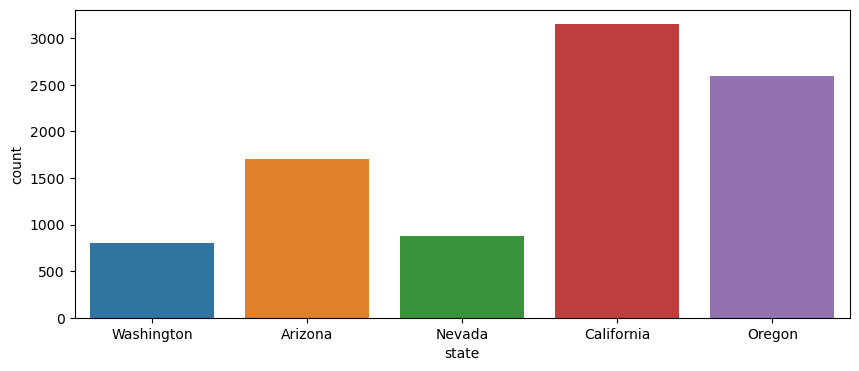

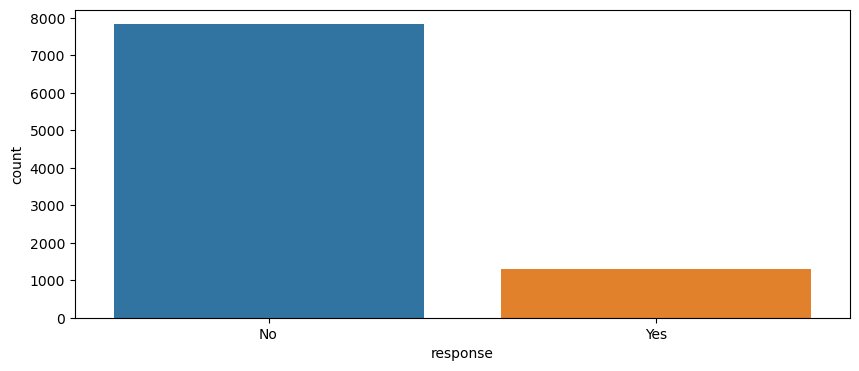

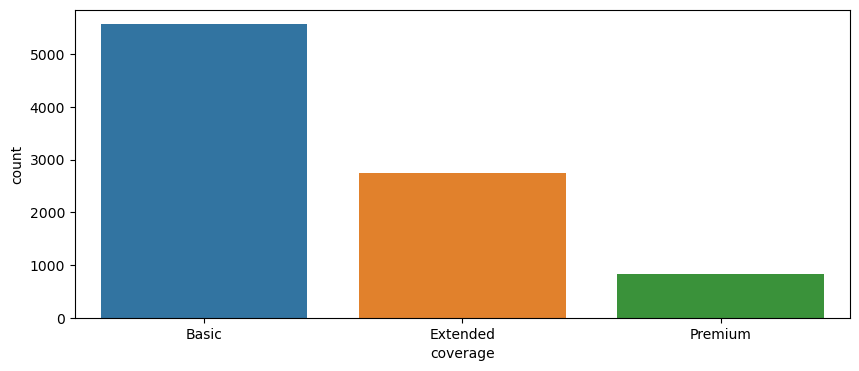

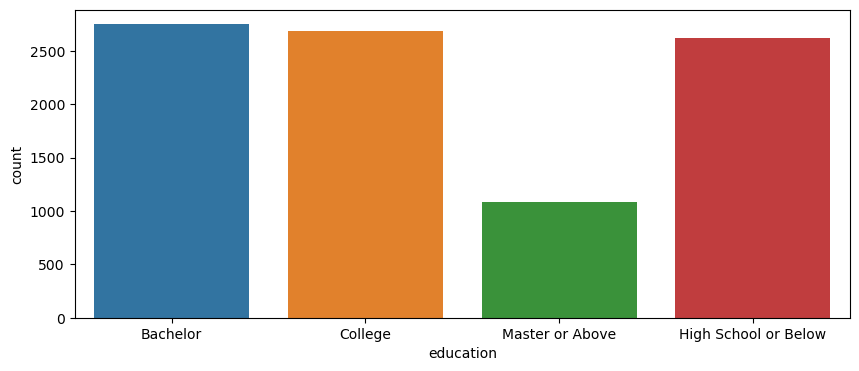

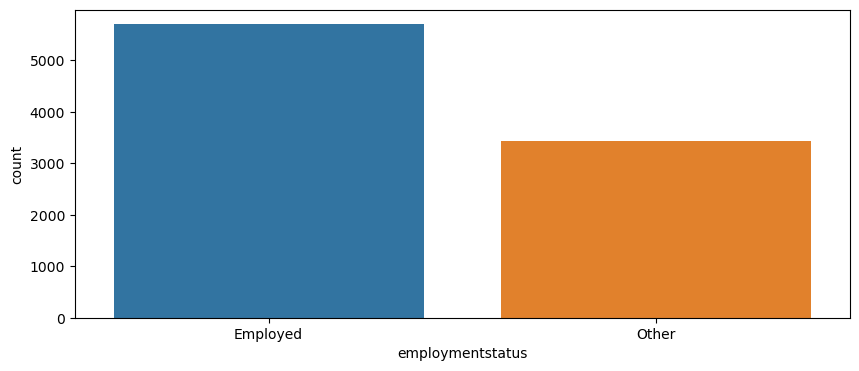

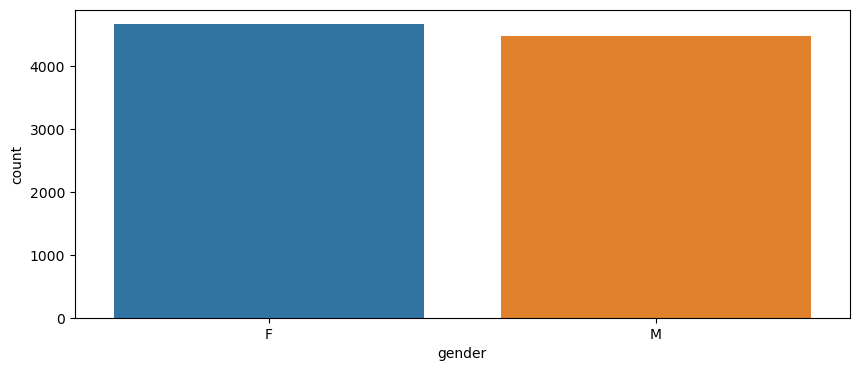

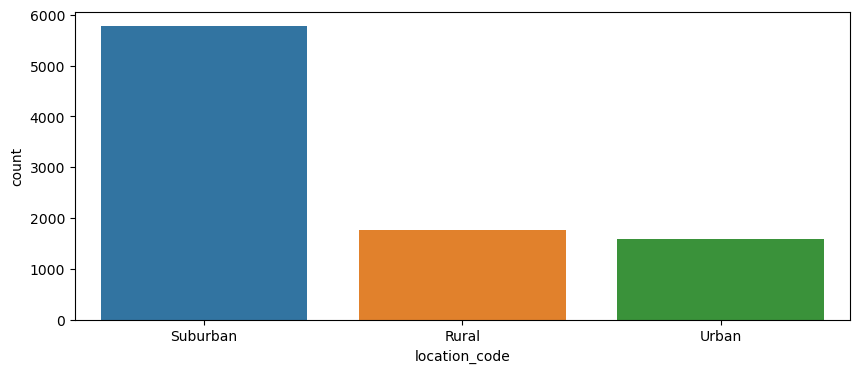

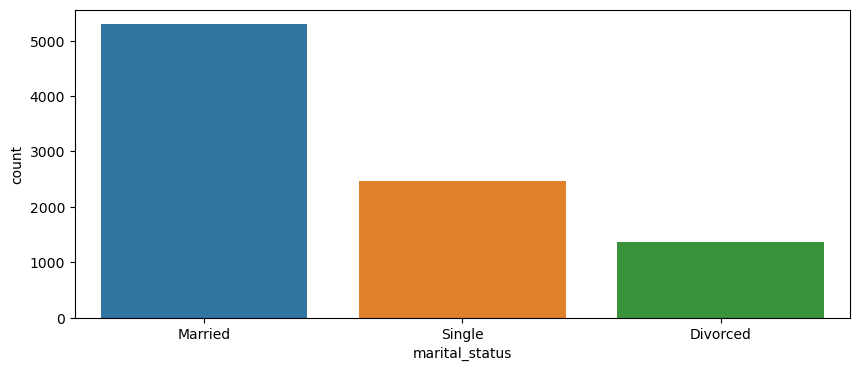

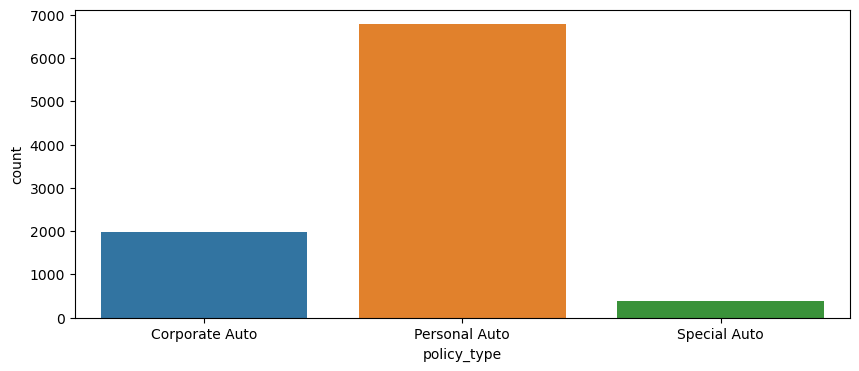

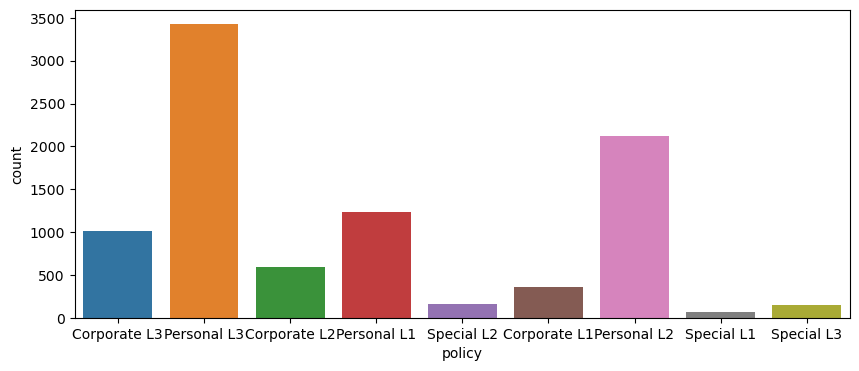

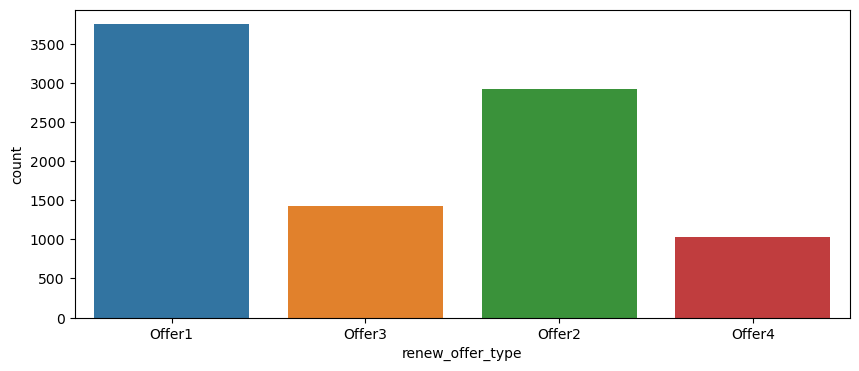

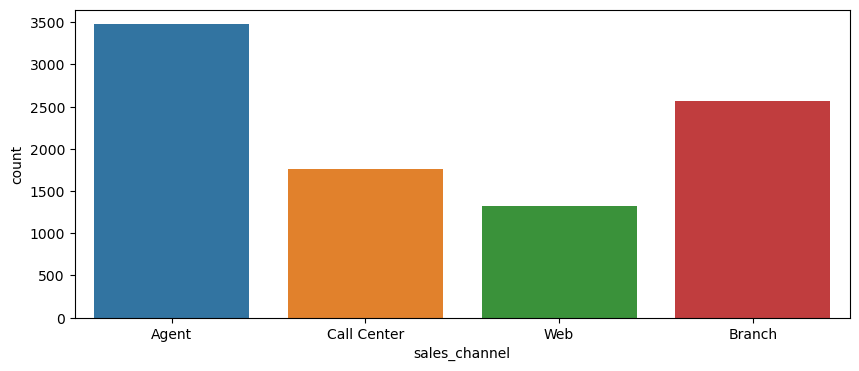

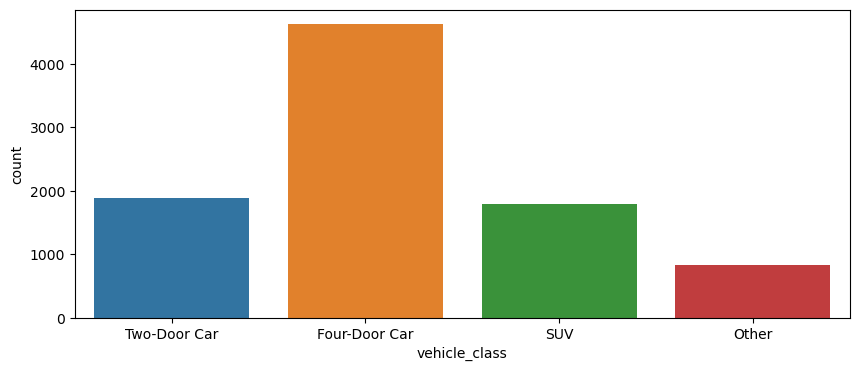

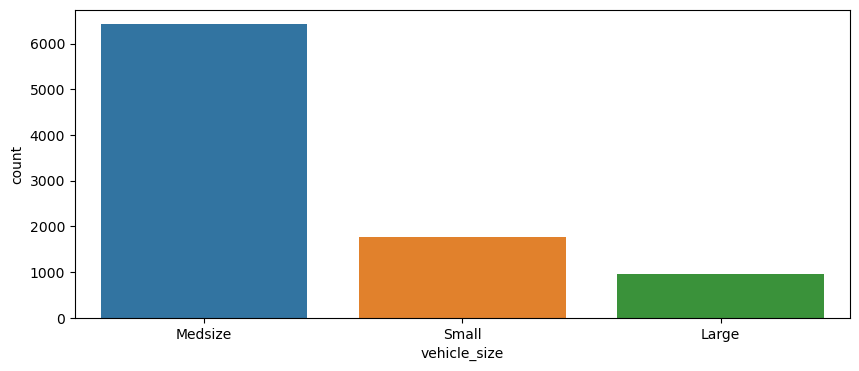

In [39]:
for col in categorical_df.columns:
    fig, ax=plt.subplots(figsize=(10, 4))
    ax = sns.countplot(x=col,data=categorical_df)
    plt.show()

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Since policy and policy type give us the same values, I am going to drop policy and keep policy type as it will give us three clear groups and ease encoding.

In [40]:
categorical_df = categorical_df.drop(['policy'], axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Other,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Other,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


### Plot time variable. Can you extract something from it?

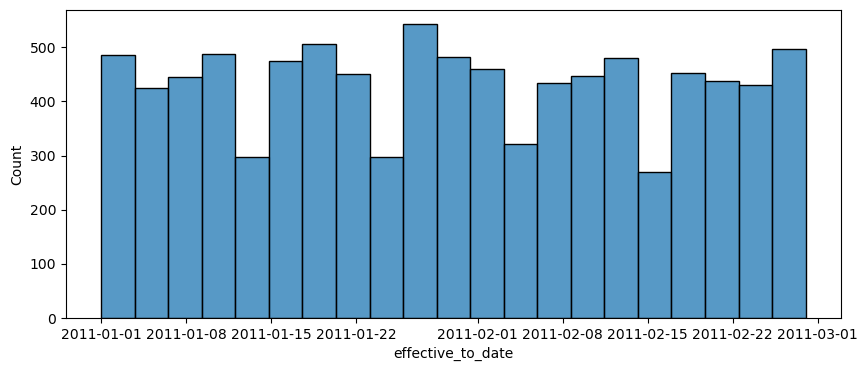

In [41]:
fig, ax=plt.subplots(figsize=(10, 4))
ax = sns.histplot(x='effective_to_date',data=customer_df)
plt.show()

I can't extract anything from this. I can convert to Day, weekday, and month columns.

In [42]:
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['weekday'] = customer_df['effective_to_date'].dt.weekday
customer_df['month'] = customer_df['effective_to_date'].dt.month

In [43]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,weekday,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,3,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,5,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,3,2


## Lab | Comparing regression models

In [44]:
#Concatenate Numerical and Categorical dataframes into one dataframe called data.

data = pd.concat((numerical_df, categorical_df), axis=1)
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Bachelor,Other,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Bachelor,Other,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


### Import sklearn train_test_split and separate the data

In [45]:
from sklearn.model_selection import train_test_split

#get X and Y
X = data.drop(['total_claim_amount'],axis=1)
y = data['total_claim_amount']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Separate X_train and X_test into numerical and categorical 

In [46]:
# numericals split
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
display(X_train_num.head())

#categoricals split
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)
display(X_train_cat.head())
X_train_cat.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6181,2821.100535,70047,71,6,37,0,1
5080,4783.917752,49793,121,3,55,0,1
4697,2808.078361,55005,70,31,39,1,1
4882,15925.057390,34455,135,8,69,0,2
6860,2580.849899,46900,66,13,59,0,1


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
6181,Arizona,No,Basic,College,Employed,M,Rural,Married,Personal Auto,Offer2,Web,Two-Door Car,Medsize
5080,Arizona,No,Extended,Bachelor,Employed,M,Suburban,Married,Personal Auto,Offer2,Agent,SUV,Small
4697,California,No,Basic,Bachelor,Employed,F,Suburban,Divorced,Personal Auto,Offer4,Call Center,Four-Door Car,Medsize
4882,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer2,Call Center,SUV,Medsize
6860,Arizona,Yes,Basic,College,Employed,M,Suburban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize


(5478, 13)

### Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [47]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train_num)
X_train_num_standardized = transformer.transform(X_train_num)
X_train_num_standardized = pd.DataFrame(X_train_num_standardized, columns=X_train_num.columns, index = X_train_num.index)
display(X_train_num_standardized.head())

X_test_num_standardized = transformer.transform(X_test_num)
X_test_num_standardized = pd.DataFrame(X_test_num_standardized, columns=X_test_num.columns, index = X_test_num.index)
display(X_test_num_standardized.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6181,-0.766758,1.057736,-0.641875,-0.898750,-0.394313,-0.422603,-0.819812
5080,-0.474338,0.391649,0.848744,-1.197376,0.253291,-0.422603,-0.819812
4697,-0.768698,0.563054,-0.671687,1.589803,-0.322357,0.689852,-0.819812
4882,1.185471,-0.112768,1.266117,-0.699666,0.756983,-0.422603,-0.397772
6860,-0.802551,0.296507,-0.790937,-0.201955,0.397203,-0.422603,-0.819812


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3827,0.293705,-0.811544,1.325742,0.096671,1.224697,1.802308,0.024268
8210,-0.112580,1.249926,-0.939999,-1.396460,-1.545609,-0.422603,-0.397772
8127,0.136882,1.618356,0.610245,0.494839,-1.113873,0.689852,0.868349
3665,-0.888438,-1.245879,-0.790937,0.096671,-0.466269,4.027218,-0.819812
852,-0.479728,0.140789,0.908369,0.693924,0.649049,-0.422603,-0.819812


### Encode the categorical variables X_train_cat and X_test_cat 

#### Ordinal Encoding

In [48]:
#training data
ord_train_cat = X_train_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]].copy()

ord_train_cat["coverage"] = ord_train_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ord_train_cat["employmentstatus"] = ord_train_cat["employmentstatus"].map({"Other" : 0, "Employed" : 1})
ord_train_cat["location_code"] = ord_train_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ord_train_cat["vehicle_size"] = ord_train_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
display(ord_train_cat.head())

#testing data
ord_test_cat = X_test_cat[["coverage", "employmentstatus", "location_code", "vehicle_size"]].copy()

ord_test_cat["coverage"] = ord_test_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ord_test_cat["employmentstatus"] = ord_test_cat["employmentstatus"].map({"Other" : 0, "Employed" : 1})
ord_test_cat["location_code"] = ord_test_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ord_test_cat["vehicle_size"] = ord_test_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
display(ord_test_cat.head())

,coverage,employmentstatus,location_code,vehicle_size
6181,0,1,0,1
5080,1,1,1,0
4697,0,1,1,1
4882,1,1,1,1
6860,0,1,1,1


,coverage,employmentstatus,location_code,vehicle_size
3827,1,0,2,1
8210,0,1,0,1
8127,2,1,0,1
3665,0,0,1,0
852,1,1,1,2


#### Onehot Encoding

In [49]:
hot_train_cat = X_train_cat.drop(["coverage", "employmentstatus", "location_code", "vehicle_size"],axis=1)
hot_test_cat = X_test_cat.drop(["coverage", "employmentstatus", "location_code", "vehicle_size"],axis=1)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(hot_train_cat)
hot_train_encoded = encoder.transform(hot_train_cat).toarray()
hot_test_encoded = encoder.transform(hot_test_cat).toarray()

cols = encoder.get_feature_names_out(input_features=hot_train_cat.columns)

hot_train_cat = pd.DataFrame(hot_train_encoded, columns=cols, index = hot_train_cat.index)
hot_test_cat = pd.DataFrame(hot_test_encoded, columns=cols, index = hot_test_cat.index)

display(hot_train_cat)
display(hot_test_cat)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Master or Above,gender_M,marital_status_Married,...,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Other,vehicle_class_SUV,vehicle_class_Two-Door Car
6181,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4882,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6860,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7894,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4860,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3265,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Master or Above,gender_M,marital_status_Married,...,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Other,vehicle_class_SUV,vehicle_class_Two-Door Car
3827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8210,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8127,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3665,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2831,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3110,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3610,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Concatenate all data

In [50]:
#concatenate numericals with categoricals
X_train = np.concatenate((X_train_num_standardized,ord_train_cat,hot_train_cat),axis=1)
X_test = np.concatenate((X_test_num_standardized,ord_test_cat,hot_test_cat),axis=1)

# X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
display(pd.DataFrame(X_train))
display(pd.DataFrame(X_test))

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.766758,1.057736,-0.641875,-0.898750,-0.394313,-0.422603,-0.819812,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.474338,0.391649,0.848744,-1.197376,0.253291,-0.422603,-0.819812,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.768698,0.563054,-0.671687,1.589803,-0.322357,0.689852,-0.819812,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.185471,-0.112768,1.266117,-0.699666,0.756983,-0.422603,-0.397772,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.802551,0.296507,-0.790937,-0.201955,0.397203,-0.422603,-0.819812,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,-0.403869,1.309188,-0.820749,1.490260,-1.185829,-0.422603,1.712430,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5474,-0.759953,1.443037,-0.612063,0.693924,-1.293763,0.689852,-0.819812,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5475,-0.462350,1.650749,-0.939999,0.096671,-0.394313,-0.422603,0.024268,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5476,-0.818838,1.901280,-0.939999,0.096671,0.253291,-0.422603,-0.819812,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.293705,-0.811544,1.325742,0.096671,1.224697,1.802308,0.024268,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.112580,1.249926,-0.939999,-1.396460,-1.545609,-0.422603,-0.397772,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.136882,1.618356,0.610245,0.494839,-1.113873,0.689852,0.868349,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.888438,-1.245879,-0.790937,0.096671,-0.466269,4.027218,-0.819812,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.479728,0.140789,0.908369,0.693924,0.649049,-0.422603,-0.819812,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0.161508,-0.380696,0.640057,-0.500582,-0.646159,-0.422603,0.024268,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3649,0.035762,-1.245879,0.520808,0.096671,-1.113873,-0.422603,0.868349,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3650,-0.533578,-0.896589,-0.761125,1.291176,-0.933983,-0.422603,0.868349,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3651,-0.248406,-0.274439,-0.224502,0.494839,1.260675,-0.422603,1.712430,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Try a simple linear regression with all the data to see whether we are getting good results.

In [53]:
from sklearn import linear_model
from sklearn.metrics import r2_score

LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [54]:
#training score
score = LR.score(X_train, y_train)
score

0.6190352632451835

In [55]:
#predictions test
predictions = LR.predict(X_test)
r2_score(y_test, predictions)

0.6340902425367345

### Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [56]:
def lrtest(X_train, y_train, X_test, y_test):
    LR = linear_model.LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    trainscore = ("Training Score: ", LR.score(X_train, y_train))
    r2score = ("R2 Score: ", r2_score(y_test, predictions))
    return trainscore,  r2score

In [57]:
def knntest(X_train, y_train, X_test, y_test, n):
    from sklearn.neighbors import KNeighborsRegressor
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(X_train, y_train)
    train_score = ("Training Score: ", KNN.score(X_train, y_train))
    test_score = ("Test Score: ", KNN.score(X_test, y_test))
    return train_score, test_score

In [58]:
lrtest(X_train, y_train, X_test, y_test)

(('Training Score: ', 0.6190352632451835), ('R2 Score: ', 0.6340902425367345))

In [80]:
knntest(X_train, y_train, X_test, y_test, 5)

(('Training Score: ', 0.7776429739446612),
 ('Test Score: ', 0.6549118843480948))

### You can check also the MLPRegressor for this task

In [82]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter = 300)
MLP.fit(X_train, y_train)

train_score = MLP.score(X_train, y_train)
print("Training Score: ", train_score)

prediction = MLP.predict(X_test)
print("R2 Score: ", r2_score(y_test, prediction))

Training Score:  0.8134097022302919
R2 Score:  0.8000530640071022


/Users/adeseye/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Check and discuss the results.

Linear Regression model is the only one that gave us a higher testing score than training score.
KNN model elbow point is at 5 neighbors, however it seems to be overtrained at that point.
MPL Regressor is the best model with 0.80 R2 score and the score increases as the max iterations increase, however it also seems to bring up a warning about iterations not reaching optimization yet, even at 300 iterations

In [84]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [85]:
numerical_df.to_csv('numerical.csv', index=False)